In [ ]:
# Code Sourced from https://github.com/ISorokos/SafeML/blob/master/Implementation_in_Python/Examples/German_Traffic_Sign_Recognition%20(GTSR)/GTSRB_CNN_SafeML_v2.ipynb.ipynb

In [15]:
!pip install pydot

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [1]:
#pip show pip   

In [2]:
#pip install numpy==1.21.6 pandas opencv-python matplotlib tensorflow-gpu scikit-learn 

In [45]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.metrics import accuracy_score
np.random.seed(42)

In [2]:
np.version.version

'1.21.6'

In [3]:
data_dir = '/home/satya/Gtsrb_clf/gtsrb/'
train_path = '/home/satya/Gtsrb_clf/gtsrb/Train'
test_path = '/home/satya/Gtsrb_clf/gtsrb/test_sorted'

# Resizing the images to 32x32x3
IMG_HEIGHT = 32
IMG_WIDTH = 32
channels = 3

In [4]:
NUM_CATEGORIES = len(os.listdir(train_path))
print('Total No. classes: ',NUM_CATEGORIES)

Total No. classes:  43


In [5]:
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39209, 32, 32, 3) (39209,)


In [6]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27446, 32, 32, 3)
X_valid.shape (11763, 32, 32, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


In [7]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


In [10]:
model = Sequential()   
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))



In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 64)          36928     
                                                      

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
epochs = 50
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/50


2023-02-15 02:48:18.222978: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_3/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-02-15 02:48:19.288074: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8700
2023-02-15 02:48:20.372084: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x1ebdd080 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-02-15 02:48:20.372128: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2023-02-15 02:48:20.390029: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-02-15 02:48:20.581868: I tensorflow/compiler/jit/xla_compilation_cache.cc:477]

429/429 [==============================] - 9s 11ms/step - loss: 1.6204 - accuracy: 0.5489 - val_loss: 0.2331 - val_accuracy: 0.9424
Epoch 2/50
429/429 [==============================] - 4s 10ms/step - loss: 0.2975 - accuracy: 0.9075 - val_loss: 0.0669 - val_accuracy: 0.9840
Epoch 3/50
429/429 [==============================] - 4s 10ms/step - loss: 0.1716 - accuracy: 0.9476 - val_loss: 0.0428 - val_accuracy: 0.9893
Epoch 4/50
429/429 [==============================] - 4s 10ms/step - loss: 0.1263 - accuracy: 0.9627 - val_loss: 0.0331 - val_accuracy: 0.9918
Epoch 5/50
429/429 [==============================] - 4s 10ms/step - loss: 0.0947 - accuracy: 0.9699 - val_loss: 0.0265 - val_accuracy: 0.9934
Epoch 6/50
429/429 [==============================] - 4s 10ms/step - loss: 0.0812 - accuracy: 0.9753 - val_loss: 0.0273 - val_accuracy: 0.9936
Epoch 7/50
429/429 [==============================] - 4s 10ms/step - loss: 0.0699 - accuracy: 0.9788 - val_loss: 0.0287 - val_accuracy: 0.9941
Epoch 8/50

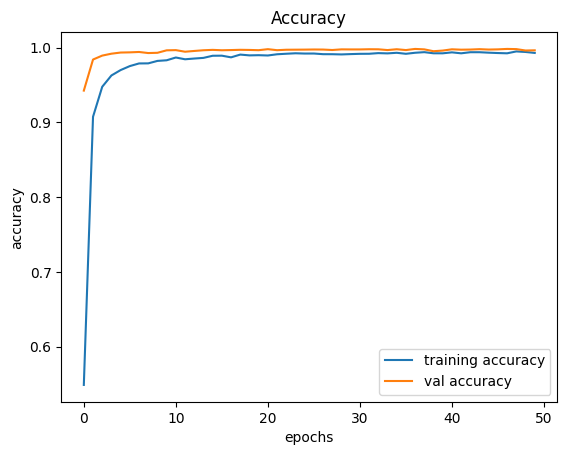

In [22]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

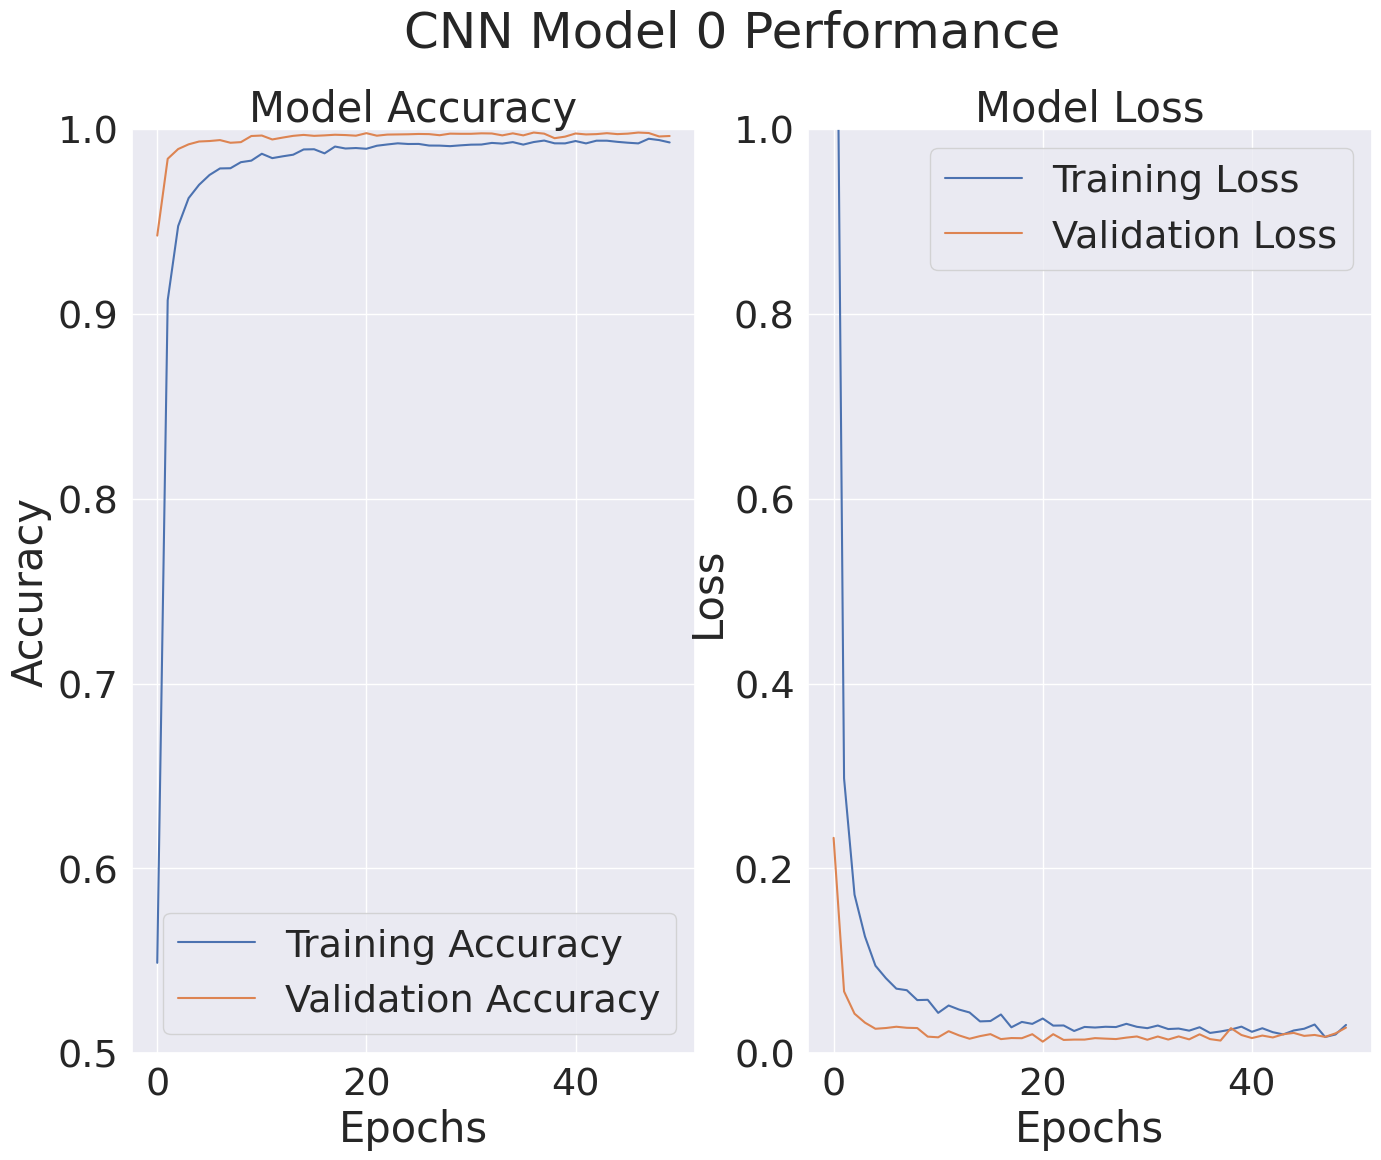

<Figure size 1000x700 with 0 Axes>

In [59]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(16,12)
performance = pd.DataFrame(history.history)
plt.figure(figsize=(10,7))
ax[1].plot(performance[['loss','val_loss']])
ax[1].legend(['Training Loss', 'Validation Loss'])
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_ylim(0,1)
ax[0].plot(performance[['accuracy','val_accuracy']])
ax[0].legend(['Training Accuracy', 'Validation Accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0.5,1)
fig.suptitle('CNN Model 0 Performance')
plt.show()

In [23]:
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255


pred = model.predict(X_test) 
pred = np.argmax(pred, axis=1)


#Accuracy with the test data
print('\nTest Data accuracy: ',accuracy_score(labels, pred)*100)

395/395 [==============================] - 2s 4ms/step

Test Data accuracy:  97.14172604908947


In [53]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, multilabel_confusion_matrix, ConfusionMatrixDisplay
import io
from PIL import Image


In [25]:
print(classification_report(labels, pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.96      0.99      0.97       720
           2       0.99      0.99      0.99       750
           3       0.98      0.98      0.98       450
           4       1.00      0.98      0.99       660
           5       0.95      0.98      0.97       630
           6       0.97      0.76      0.85       150
           7       0.98      0.99      0.99       450
           8       0.98      0.96      0.97       450
           9       0.99      1.00      1.00       480
          10       1.00      0.98      0.99       660
          11       0.95      0.96      0.95       420
          12       0.94      1.00      0.97       690
          13       1.00      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       1.00      1.00      1.00       210
          16       1.00      0.99      1.00       150
          17       0.99    

In [29]:
f1_score(labels,pred,average='weighted')

0.9709265859619424

In [35]:
model_cm = confusion_matrix(labels,pred)

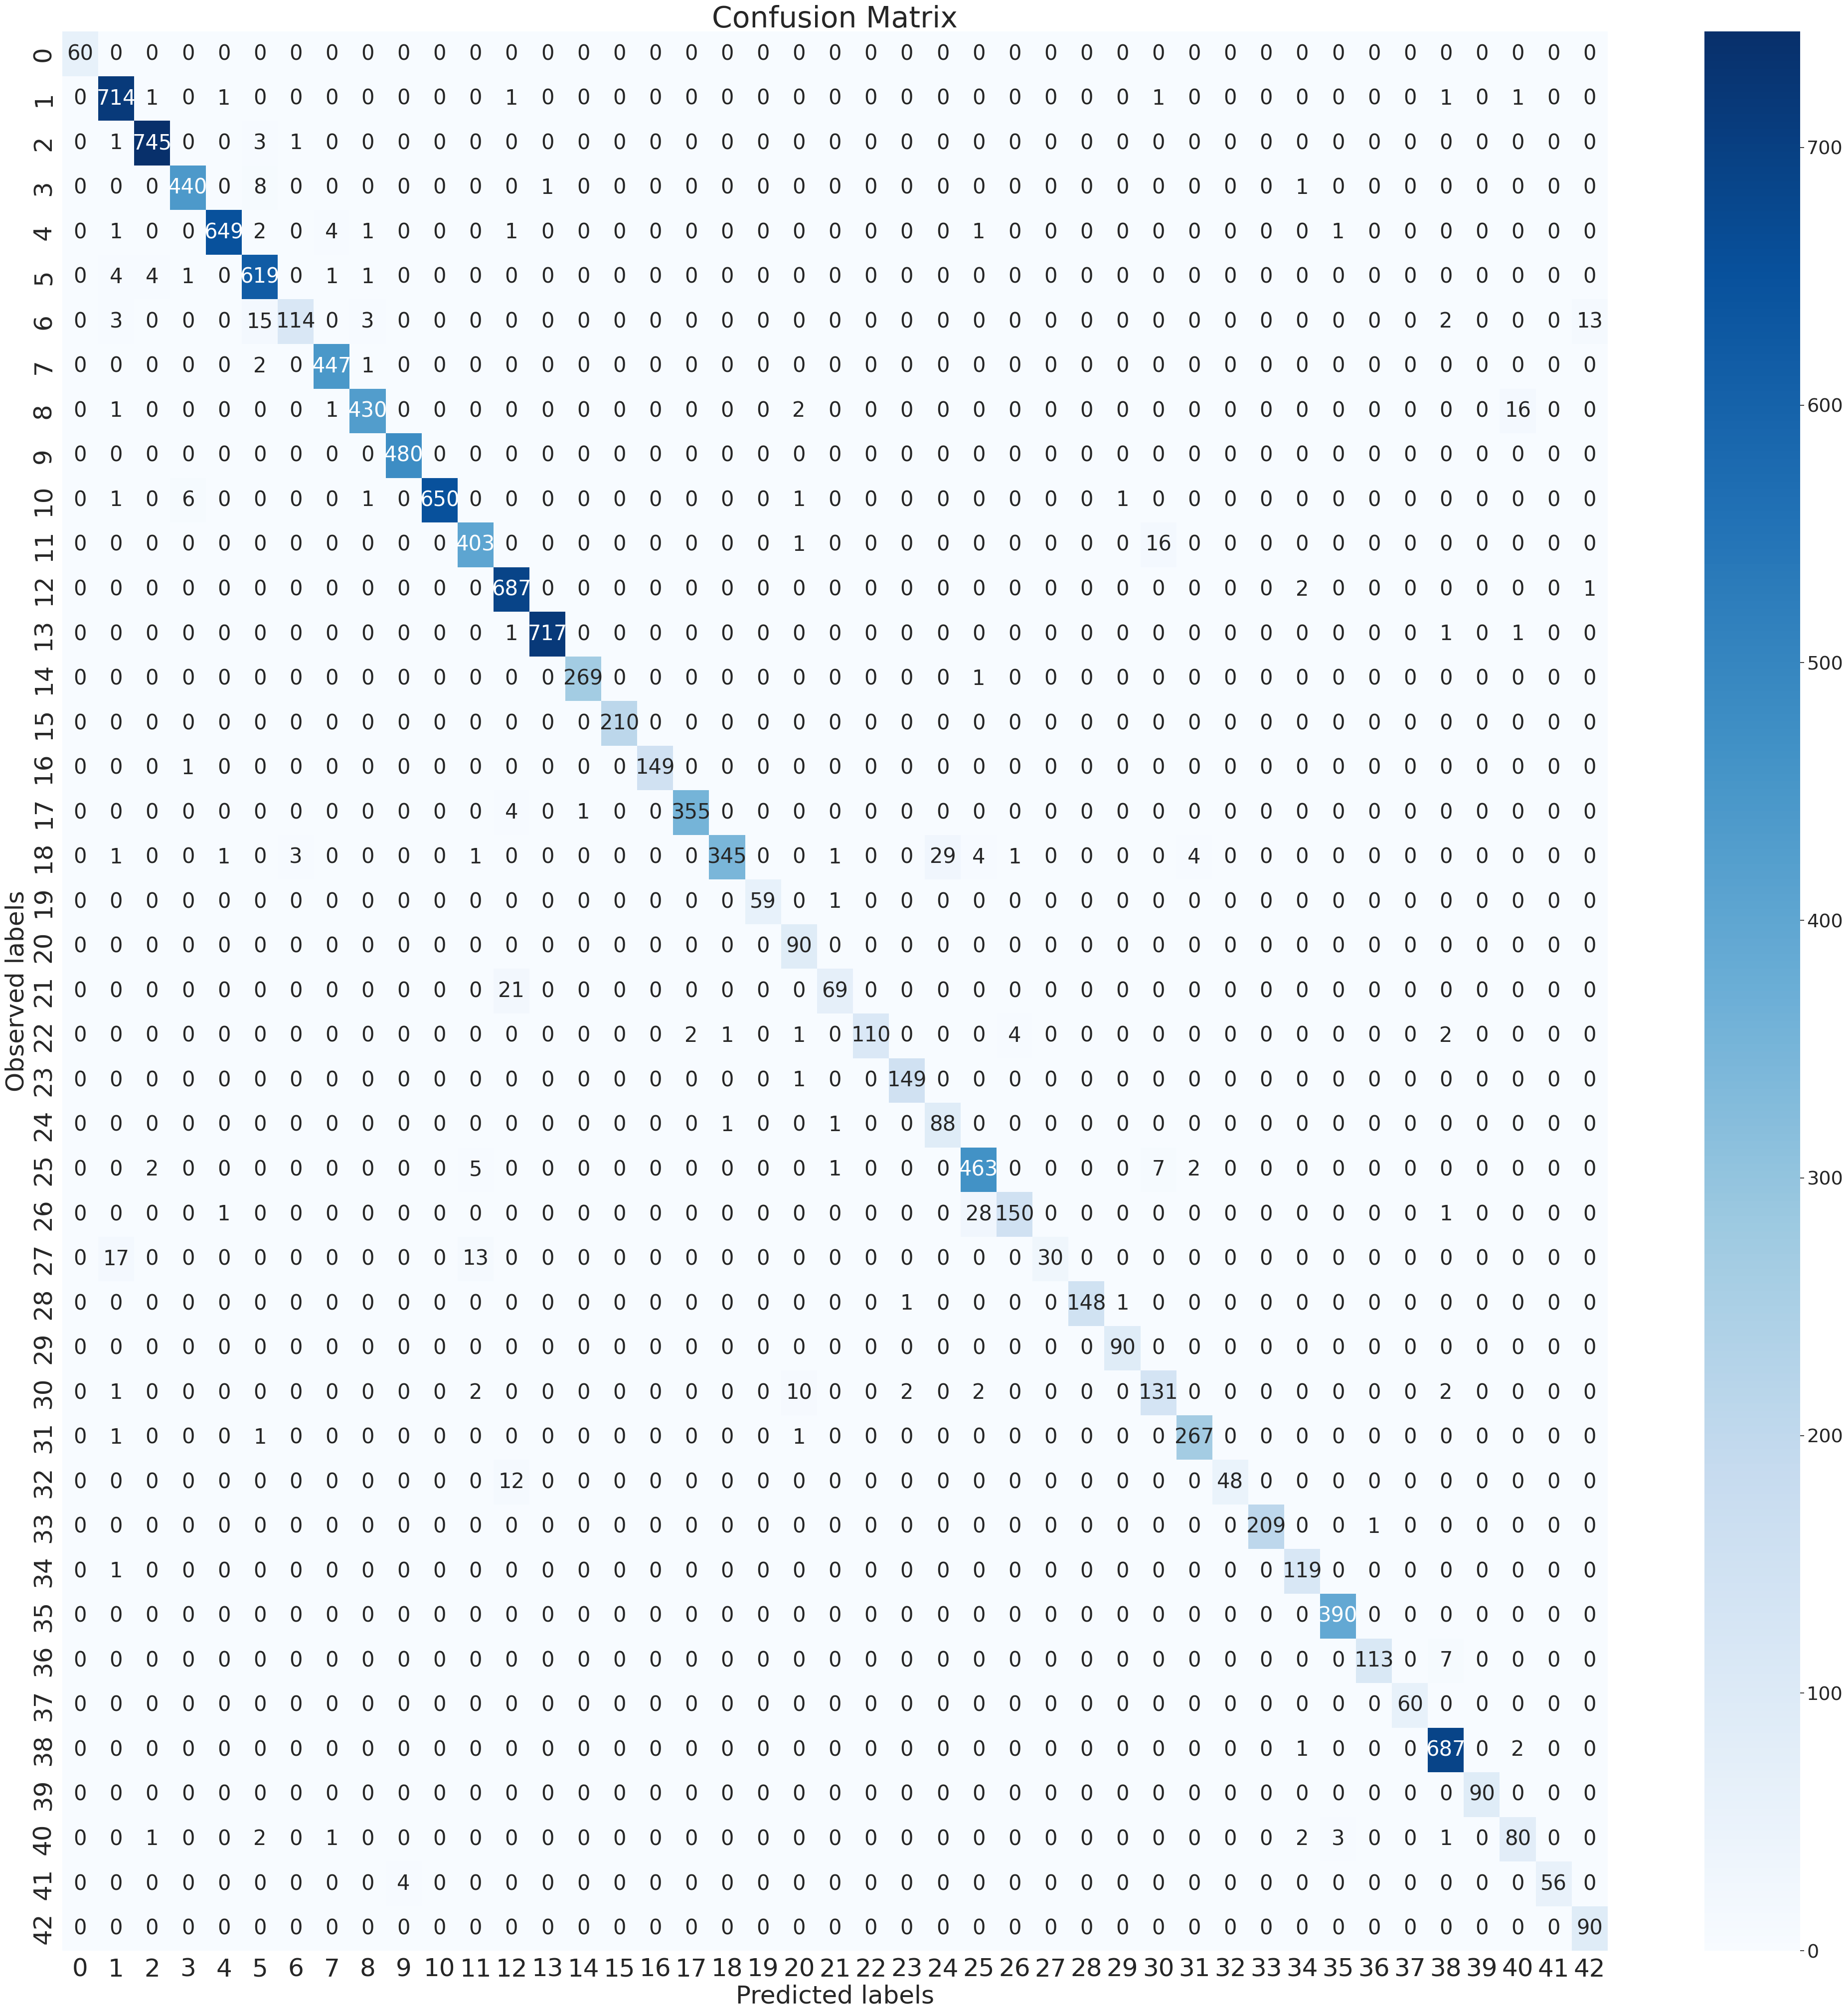

<Figure size 5000x5000 with 0 Axes>

In [55]:

ax = plt.subplot()
sns.set(font_scale=2.5) # Adjust to fit
sns.heatmap(model_cm, annot=True, ax=ax, cmap="Blues", fmt="g");  

# Labels, title and ticks
label_font = {'size':'36'}  # Adjust to fit
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('Observed labels', fontdict=label_font);

title_font = {'size':'42'}  # Adjust to fit
ax.set_title('Confusion Matrix', fontdict=title_font);

ax.tick_params(axis='both', which='major', labelsize=36)  # Adjust to fit
plt.show()

#plt.savefig('cm_model0.png', format='png')



In [30]:
model.save('model0')

INFO:tensorflow:Assets written to: model0/assets


INFO:tensorflow:Assets written to: model0/assets


In [12]:
#model.save('Tst_Acr_98-14')

INFO:tensorflow:Assets written to: Tst_Acr_98-14/assets


INFO:tensorflow:Assets written to: Tst_Acr_98-14/assets


In [31]:
#model = tf.keras.models.load_model('Tst_Acr_98-14')

In [60]:
model1 = Sequential()   
model1.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)))
model1.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Dropout(rate=0.25))
model1.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model1.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Dropout(rate=0.25))
model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(rate=0.5))
model1.add(Dense(43, activation='softmax'))

model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [61]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 64)        4864      
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 64)        102464    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 10, 10, 128)       73856     
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 128)         147584    
                                                      

In [62]:
epochs_1 = 50
history_1 = model1.fit(X_train, y_train, batch_size=32, epochs=epochs_1, validation_data=(X_val, y_val))

Epoch 1/50


2023-02-15 04:25:12.589377: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/dropout_9/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


858/858 [==============================] - 11s 10ms/step - loss: 3.6133 - accuracy: 0.0611 - val_loss: 3.4511 - val_accuracy: 0.1700
Epoch 2/50
858/858 [==============================] - 9s 10ms/step - loss: 3.2791 - accuracy: 0.1621 - val_loss: 2.9263 - val_accuracy: 0.3263
Epoch 3/50
858/858 [==============================] - 9s 10ms/step - loss: 2.8532 - accuracy: 0.2792 - val_loss: 2.4067 - val_accuracy: 0.4466
Epoch 4/50
858/858 [==============================] - 9s 10ms/step - loss: 2.4462 - accuracy: 0.3822 - val_loss: 1.9498 - val_accuracy: 0.5088
Epoch 5/50
858/858 [==============================] - 9s 10ms/step - loss: 2.1175 - accuracy: 0.4531 - val_loss: 1.6247 - val_accuracy: 0.5874
Epoch 6/50
858/858 [==============================] - 9s 10ms/step - loss: 1.8510 - accuracy: 0.5113 - val_loss: 1.3621 - val_accuracy: 0.6590
Epoch 7/50
858/858 [==============================] - 9s 10ms/step - loss: 1.6374 - accuracy: 0.5568 - val_loss: 1.1371 - val_accuracy: 0.7274
Epoch 8/5

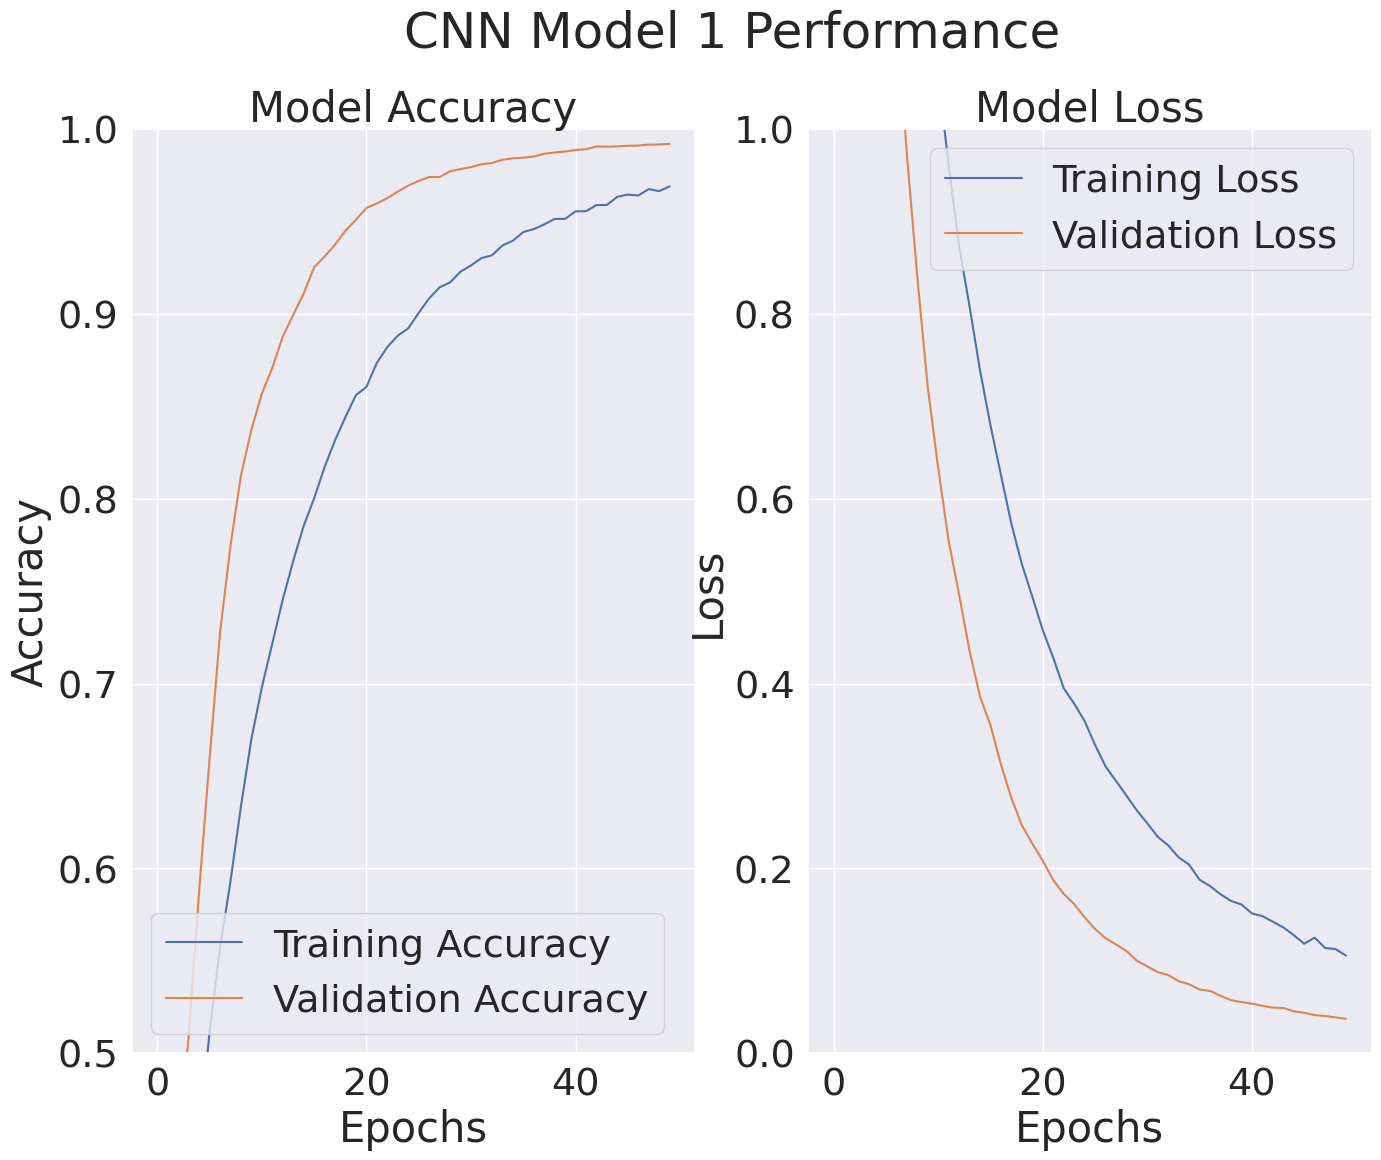

<Figure size 1000x700 with 0 Axes>

In [64]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(16,12)
performance = pd.DataFrame(history_1.history)
plt.figure(figsize=(10,7))
ax[1].plot(performance[['loss','val_loss']])
ax[1].legend(['Training Loss', 'Validation Loss'])
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_ylim(0,1)
ax[0].plot(performance[['accuracy','val_accuracy']])
ax[0].legend(['Training Accuracy', 'Validation Accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0.5,1)
fig.suptitle('CNN Model 1 Performance')
plt.show()

In [65]:
pred_1 = model1.predict(X_test) 
pred_1 = np.argmax(pred_1, axis=1)


395/395 [==============================] - 1s 4ms/step


In [66]:

#Accuracy with the test data
print('\nTest Data accuracy: ',accuracy_score(labels, pred_1)*100)


Test Data accuracy:  95.55819477434679


In [67]:
model1.save('model1')

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


In [68]:
print(classification_report(labels, pred_1))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.91      0.98      0.95       720
           2       0.95      0.97      0.96       750
           3       0.95      0.98      0.96       450
           4       0.97      0.97      0.97       660
           5       0.95      0.91      0.93       630
           6       0.98      0.83      0.90       150
           7       0.98      0.91      0.94       450
           8       0.92      0.97      0.94       450
           9       0.96      1.00      0.98       480
          10       0.99      0.98      0.99       660
          11       0.95      0.99      0.97       420
          12       0.96      0.96      0.96       690
          13       0.98      1.00      0.99       720
          14       1.00      1.00      1.00       270
          15       0.89      0.99      0.94       210
          16       0.99      0.98      0.99       150
          17       1.00    

In [69]:
model2 = Sequential()   
model2.add(Conv2D(filters=32, kernel_size=(5,5), activation='tanh', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)))
model2.add(Conv2D(filters=32, kernel_size=(5,5), activation='tanh'))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(rate=0.5))
model2.add(Conv2D(filters=64, kernel_size=(3,3), activation='tanh'))
model2.add(Conv2D(filters=64, kernel_size=(3,3), activation='tanh'))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(rate=0.25))
model2.add(Flatten())
model2.add(Dense(128, activation='tanh'))
model2.add(Dropout(rate=0.5))
model2.add(Dense(43, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [70]:
epochs_2 = 50
history_2 = model2.fit(X_train, y_train, batch_size=32, epochs=epochs_2, validation_data=(X_val, y_val))

Epoch 1/50


2023-02-15 04:52:59.796796: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_4/dropout_12/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


858/858 [==============================] - 10s 10ms/step - loss: 0.8742 - accuracy: 0.7654 - val_loss: 0.1184 - val_accuracy: 0.9702
Epoch 2/50
858/858 [==============================] - 8s 10ms/step - loss: 0.2048 - accuracy: 0.9447 - val_loss: 0.0653 - val_accuracy: 0.9824
Epoch 3/50
858/858 [==============================] - 8s 10ms/step - loss: 0.1378 - accuracy: 0.9616 - val_loss: 0.0403 - val_accuracy: 0.9904
Epoch 4/50
858/858 [==============================] - 8s 10ms/step - loss: 0.1264 - accuracy: 0.9633 - val_loss: 0.0429 - val_accuracy: 0.9893
Epoch 5/50
858/858 [==============================] - 8s 10ms/step - loss: 0.1080 - accuracy: 0.9681 - val_loss: 0.0358 - val_accuracy: 0.9910
Epoch 6/50
858/858 [==============================] - 8s 10ms/step - loss: 0.1047 - accuracy: 0.9694 - val_loss: 0.0294 - val_accuracy: 0.9929
Epoch 7/50
858/858 [==============================] - 8s 10ms/step - loss: 0.0952 - accuracy: 0.9705 - val_loss: 0.0278 - val_accuracy: 0.9933
Epoch 8/5

In [75]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 32)        2432      
                                                                 
 conv2d_17 (Conv2D)          (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 conv2d_19 (Conv2D)          (None, 8, 8, 64)          36928     
                                                      

In [71]:
pred_2 = model2.predict(X_test) 
pred_2 = np.argmax(pred_2, axis=1)


395/395 [==============================] - 1s 4ms/step


In [72]:
print('\nTest Data accuracy: ',accuracy_score(labels, pred_2)*100)


Test Data accuracy:  96.93586698337292


In [73]:
model2.save('Model2')

INFO:tensorflow:Assets written to: Model2/assets


INFO:tensorflow:Assets written to: Model2/assets


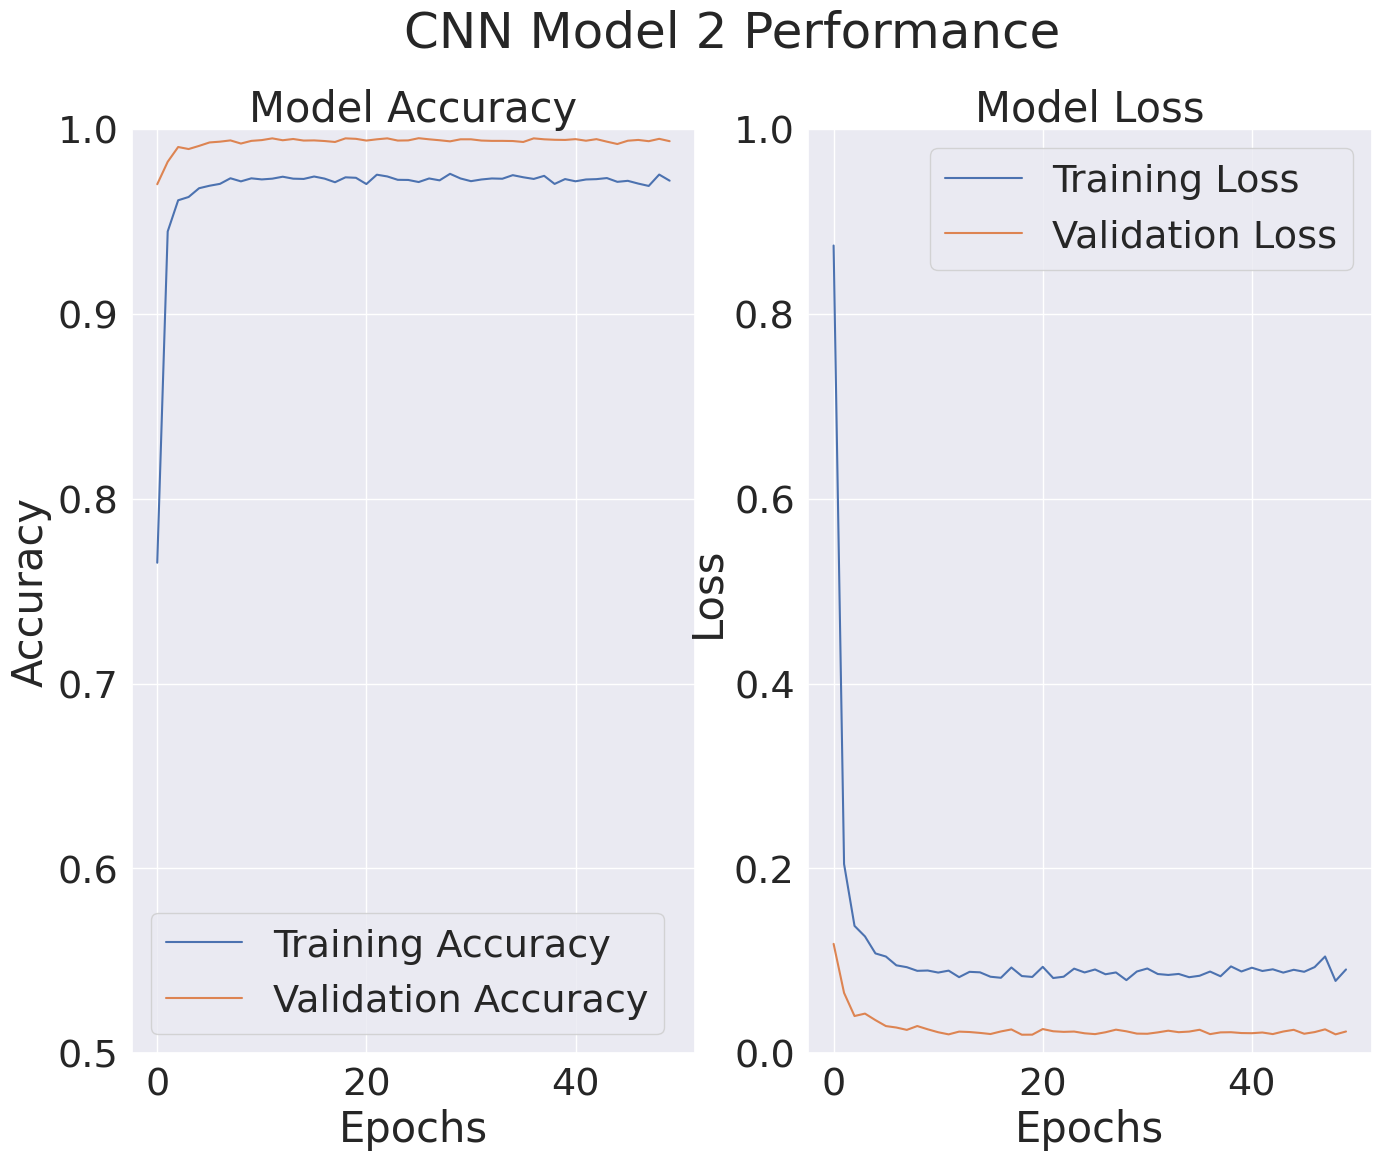

<Figure size 1000x700 with 0 Axes>

In [74]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(16,12)
performance = pd.DataFrame(history_2.history)
plt.figure(figsize=(10,7))
ax[1].plot(performance[['loss','val_loss']])
ax[1].legend(['Training Loss', 'Validation Loss'])
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_ylim(0,1)
ax[0].plot(performance[['accuracy','val_accuracy']])
ax[0].legend(['Training Accuracy', 'Validation Accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0.5,1)
fig.suptitle('CNN Model 2 Performance')
plt.show()

In [76]:
print(classification_report(labels, pred_2))


              precision    recall  f1-score   support

           0       1.00      0.95      0.97        60
           1       0.96      0.98      0.97       720
           2       0.98      1.00      0.99       750
           3       0.97      0.99      0.98       450
           4       0.98      0.98      0.98       660
           5       0.99      0.95      0.97       630
           6       0.98      0.83      0.90       150
           7       0.98      0.98      0.98       450
           8       0.98      0.95      0.97       450
           9       0.95      1.00      0.98       480
          10       0.99      1.00      0.99       660
          11       0.89      0.98      0.93       420
          12       1.00      0.94      0.97       690
          13       0.99      1.00      0.99       720
          14       1.00      0.98      0.99       270
          15       0.85      1.00      0.92       210
          16       1.00      0.99      1.00       150
          17       0.99    

In [ ]:
# Safety Monitoring through Statistical Parametric Mapping

In [121]:
#!pip install spm1d
import os
from matplotlib import pyplot
import spm1d

# Separating Wrong Responses of the CNN Classifier
#X_test_wrong, y_test_wrong = X_test[np.where(labels != pred)], test[np.where(labels != pred)]
X_test_wrong = labels[np.where(labels != pred_2)]

In [122]:
len(X_test_wrong)

387

In [125]:
y_test_wrong = labels[np.where(labels != pred_2)]

In [126]:
len(y_test_wrong)

387

In [127]:
y_test_wrong

array([25, 25, 25, 30, 29, 30,  8, 12, 30,  4,  1,  6, 29, 26,  5,  4, 38,
        6, 12,  4, 30, 40,  6,  4,  4, 29, 12, 26,  1, 27, 12,  0, 38, 12,
       21, 11, 12, 18,  5,  8, 14,  5,  8, 12,  5, 30, 21, 26, 12, 21, 41,
       38,  6,  5,  5, 21, 22,  8,  4, 18, 18, 33, 30,  1, 27, 12, 26,  8,
       12, 21, 12, 26,  7,  5, 26, 11,  2,  5,  4, 38,  5, 30, 35, 27, 24,
        5,  5,  5, 11, 27, 10, 12, 15,  7, 41,  5,  8, 11, 11, 18,  6, 11,
       12,  6,  6, 27, 30, 12, 41, 35,  8, 38, 26, 18, 12, 12, 30, 12,  5,
        8, 18, 30,  8,  1, 41, 21, 21, 13,  5,  6, 26, 41, 12,  1, 30, 12,
       21, 27,  8, 21, 26, 40,  7,  7, 18,  4,  4, 29, 30, 12, 27, 13, 14,
       22, 18, 12, 27,  5, 26, 40, 11, 40, 25, 27,  6, 12, 10, 21,  3, 27,
        8, 27,  6, 25,  5, 13, 27,  6, 12, 30, 30, 38,  3,  6, 26,  4,  6,
       41,  6, 25, 30, 26,  8, 26, 36,  0,  4, 27,  5,  5, 25, 12, 26, 18,
       18, 39,  9, 25, 24, 22,  5, 27, 30,  8, 26, 12, 10, 12, 18,  7,  1,
       11, 30, 27, 21, 26

In [170]:
plt_ytest_wrong = y_test_wrong.astype('str')

(array([15., 30.,  8., 22., 39.,  0., 14., 14., 26., 28.,  0., 32.,  8.,
         8., 17.,  3.,  0., 32.,  9., 22.,  5.,  0.,  7.,  8.,  1.,  7.,
         0.,  1.,  2.,  6.,  3.,  1.,  0.,  3.,  5.,  3.,  1.,  0.,  1.,
         3.,  1.,  1.,  1.]),
 array([ 0.        ,  0.81395349,  1.62790698,  2.44186047,  3.25581395,
         4.06976744,  4.88372093,  5.69767442,  6.51162791,  7.3255814 ,
         8.13953488,  8.95348837,  9.76744186, 10.58139535, 11.39534884,
        12.20930233, 13.02325581, 13.8372093 , 14.65116279, 15.46511628,
        16.27906977, 17.09302326, 17.90697674, 18.72093023, 19.53488372,
        20.34883721, 21.1627907 , 21.97674419, 22.79069767, 23.60465116,
        24.41860465, 25.23255814, 26.04651163, 26.86046512, 27.6744186 ,
        28.48837209, 29.30232558, 30.11627907, 30.93023256, 31.74418605,
        32.55813953, 33.37209302, 34.18604651, 35.        ]),
 <BarContainer object of 43 artists>)

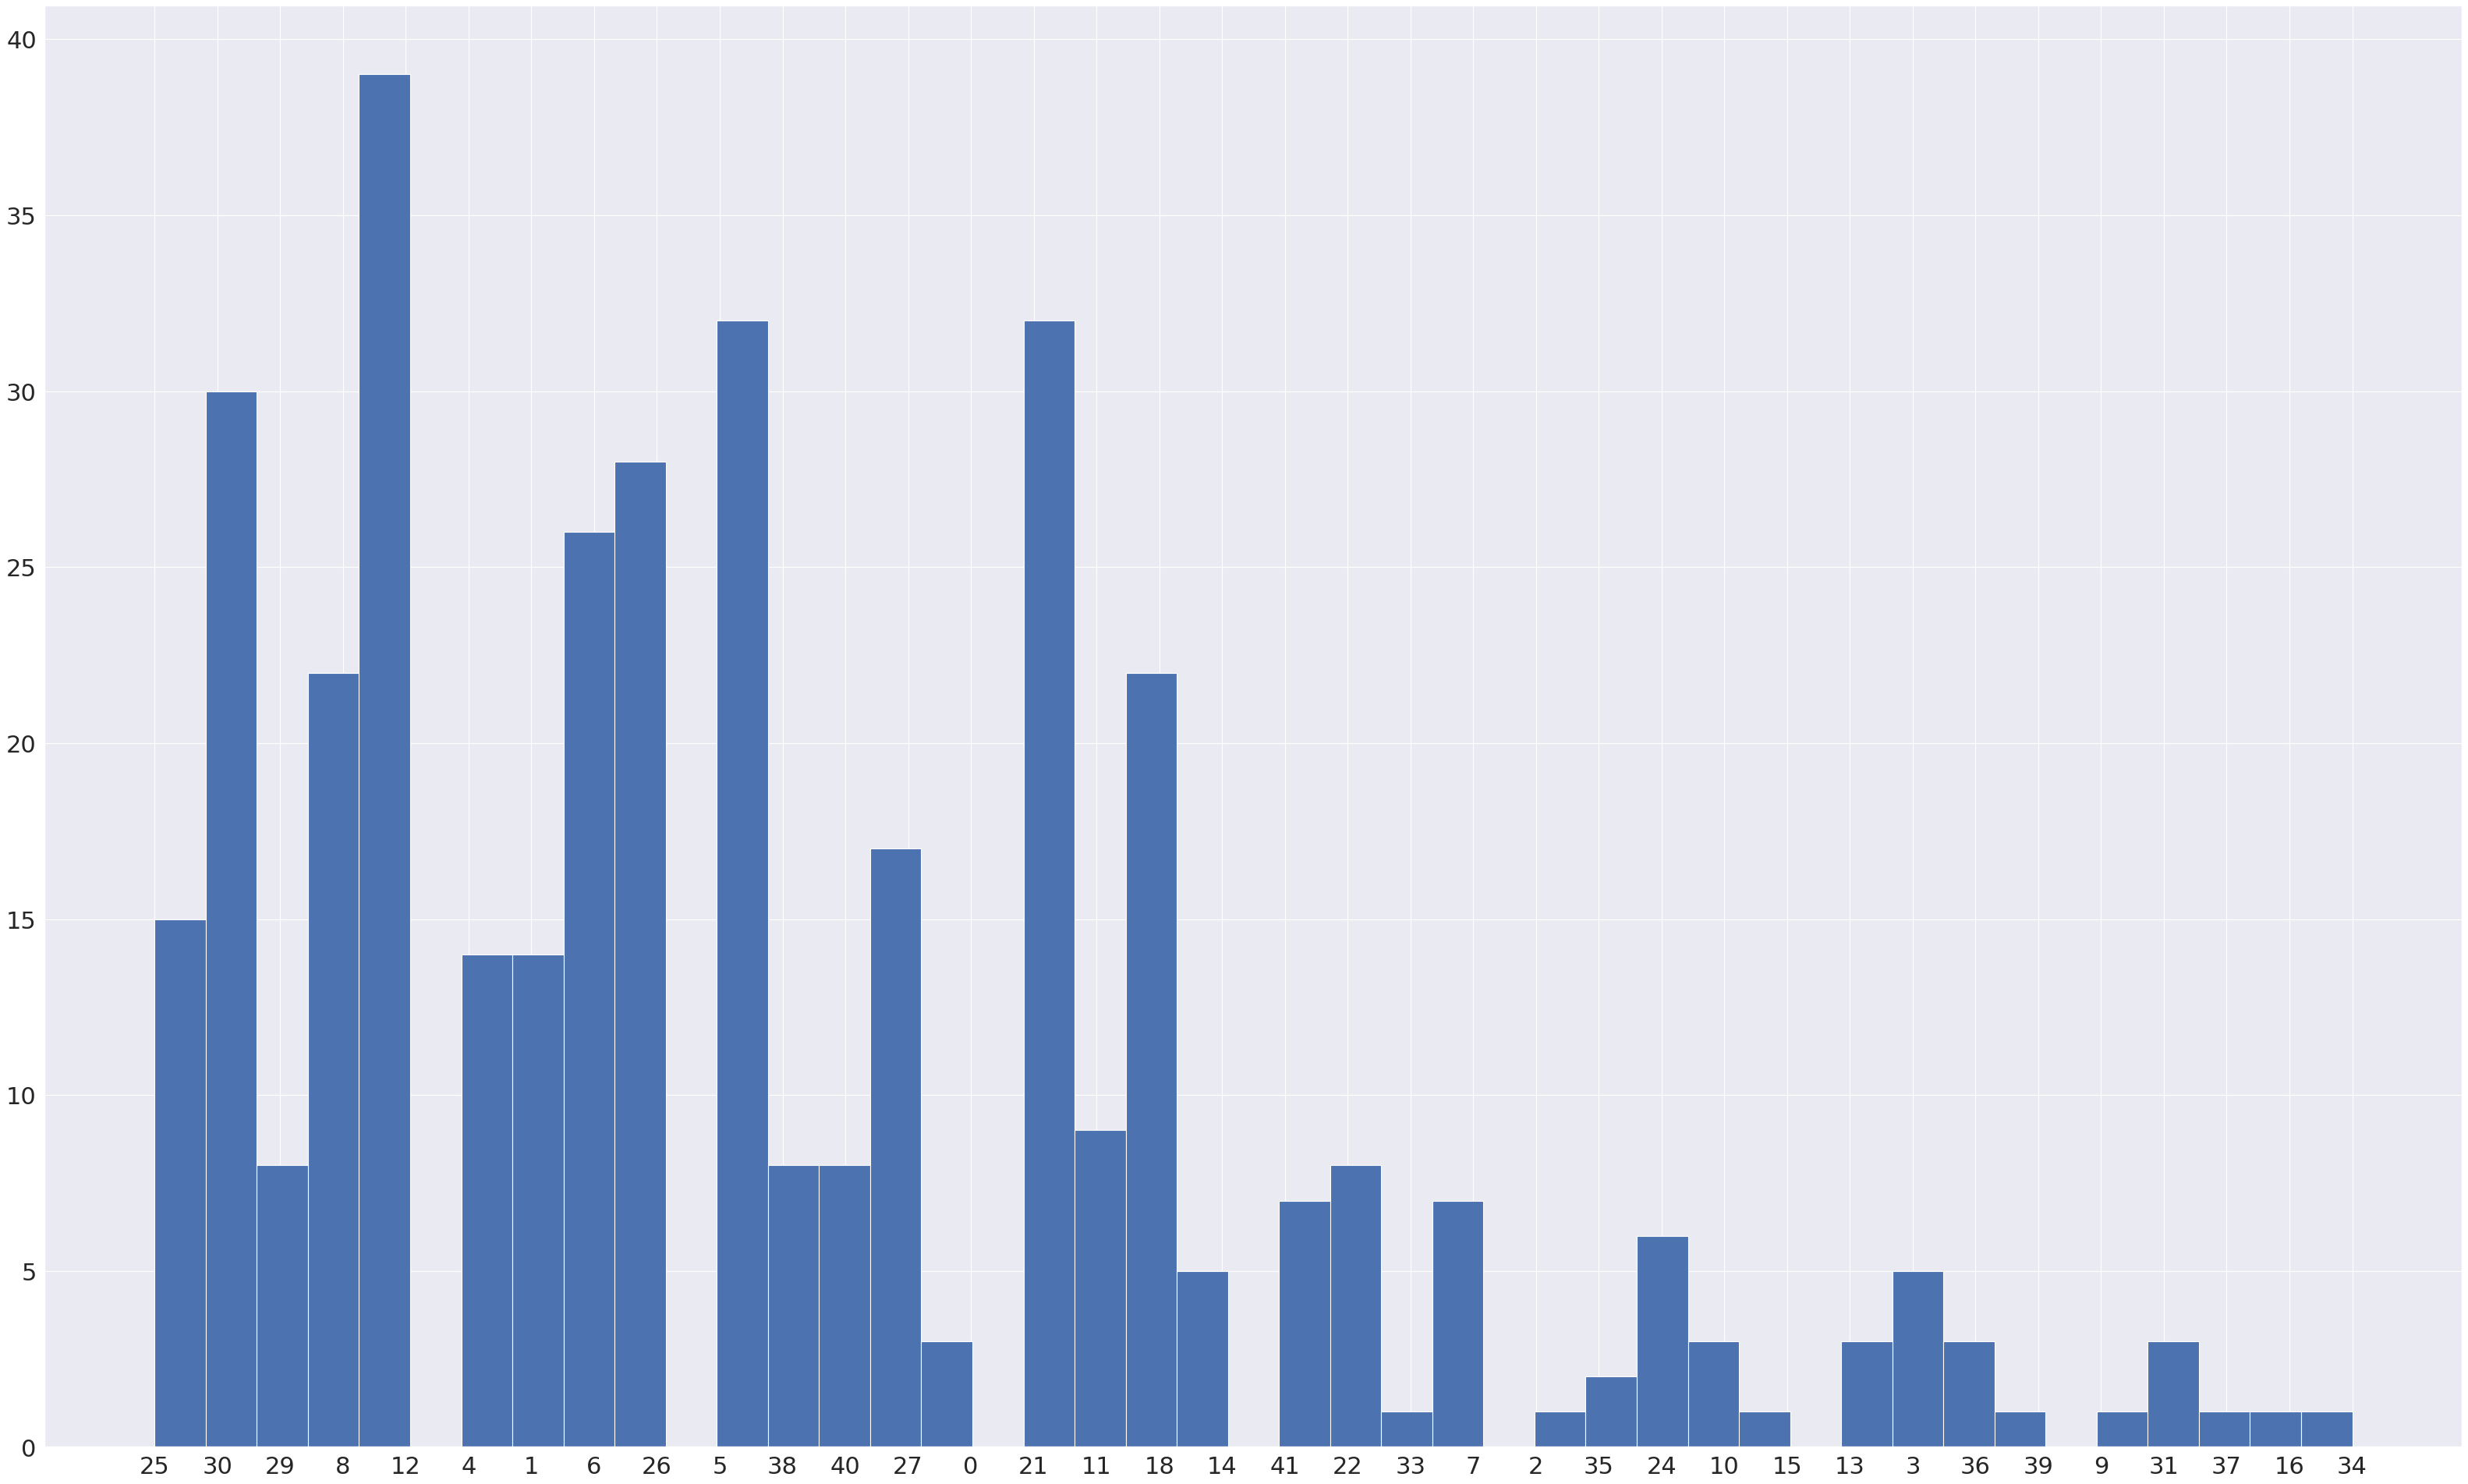

In [171]:
from matplotlib.pyplot import figure

figure(figsize=(50, 30), dpi=80)
pyplot.hist(plt_ytest_wrong,bins=43)

In [172]:
np.unique(plt_ytest_wrong, return_counts=True)

(array(['0', '1', '10', '11', '12', '13', '14', '15', '16', '18', '2',
        '21', '22', '24', '25', '26', '27', '29', '3', '30', '31', '33',
        '34', '35', '36', '37', '38', '39', '4', '40', '41', '5', '6', '7',
        '8', '9'], dtype='<U21'),
 array([ 3, 14,  3,  9, 39,  3,  5,  1,  1, 22,  1, 32,  8,  6, 15, 28, 17,
         8,  5, 30,  3,  1,  1,  2,  3,  1,  8,  1, 14,  8,  7, 32, 26,  7,
        22,  1]))

In [130]:

X_test_wrong_12, y_test_wrong_12 = X_test[np.where(labels == 12)], labels[np.where(labels == 12)]

In [131]:
X_train_12 = X_train[np.where(y_train[:,12] == 1)]

##Safety Monitoring through Statistical Parametric Mapping


In [141]:

X_test_wrong_21, y_test_wrong_21 = X_test[np.where(labels == 21)], labels[np.where(labels == 21)]
X_train_12 = X_train[np.where(y_train[:,21] == 1)]

In [132]:
def Wasserstein_Dist(XX, YY):
  
    import numpy as np
    nx = len(XX)
    ny = len(YY)
    n = nx + ny

    XY = np.concatenate([XX,YY])
    X2 = np.concatenate([np.repeat(1/nx, nx), np.repeat(0, ny)])
    Y2 = np.concatenate([np.repeat(0, nx), np.repeat(1/ny, ny)])

    S_Ind = np.argsort(XY)
    XY_Sorted = XY[S_Ind]
    X2_Sorted = X2[S_Ind]
    Y2_Sorted = Y2[S_Ind]

    Res = 0
    E_CDF = 0
    F_CDF = 0
    power = 1

    for ii in range(0, n-2):
        E_CDF = E_CDF + X2_Sorted[ii]
        F_CDF = F_CDF + Y2_Sorted[ii]
        height = abs(F_CDF-E_CDF)
        width = XY_Sorted[ii+1] - XY_Sorted[ii]
        Res = Res + (height ** power) * width;  
 
    return Res

def  Wasserstein_Dist_PVal(XX, YY):
    import random
    nboots = 1000
    WD = Wasserstein_Dist(XX,YY)
    na = len(XX)
    nb = len(YY)
    n = na + nb
    comb = np.concatenate([XX,YY])
    reps = 0
    bigger = 0
    for ii in range(1, nboots):
        e = random.sample(range(n), na)
        f = random.sample(range(n), nb)
        boost_WD = Wasserstein_Dist(comb[e],comb[f]);
        if (boost_WD > WD):
            bigger = 1 + bigger
            
    pVal = bigger/nboots;

    return pVal, WD



0.8774847908745247
0.9917548076923077
0.9974886363636364


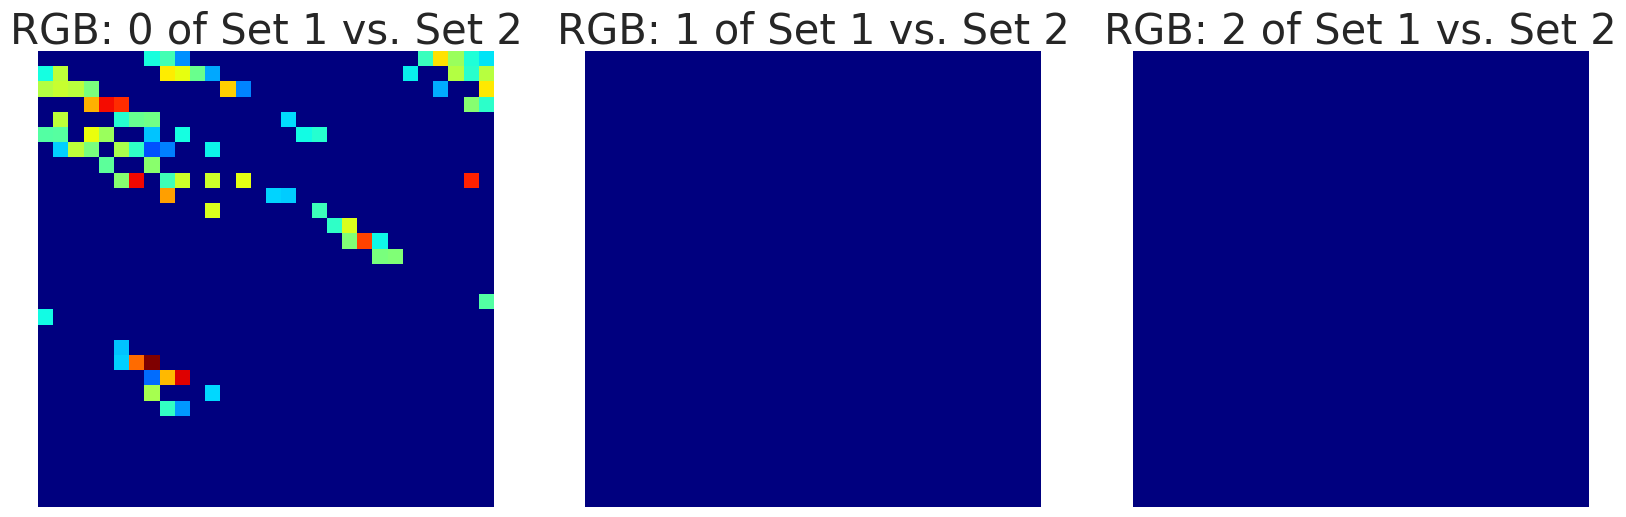

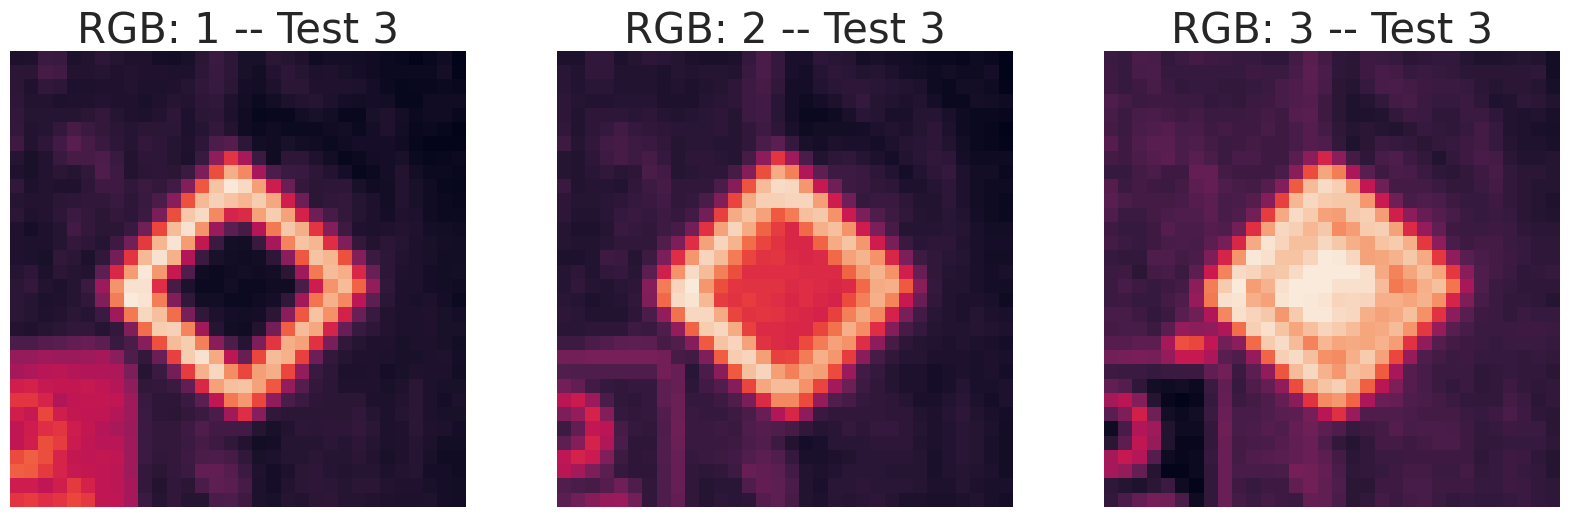

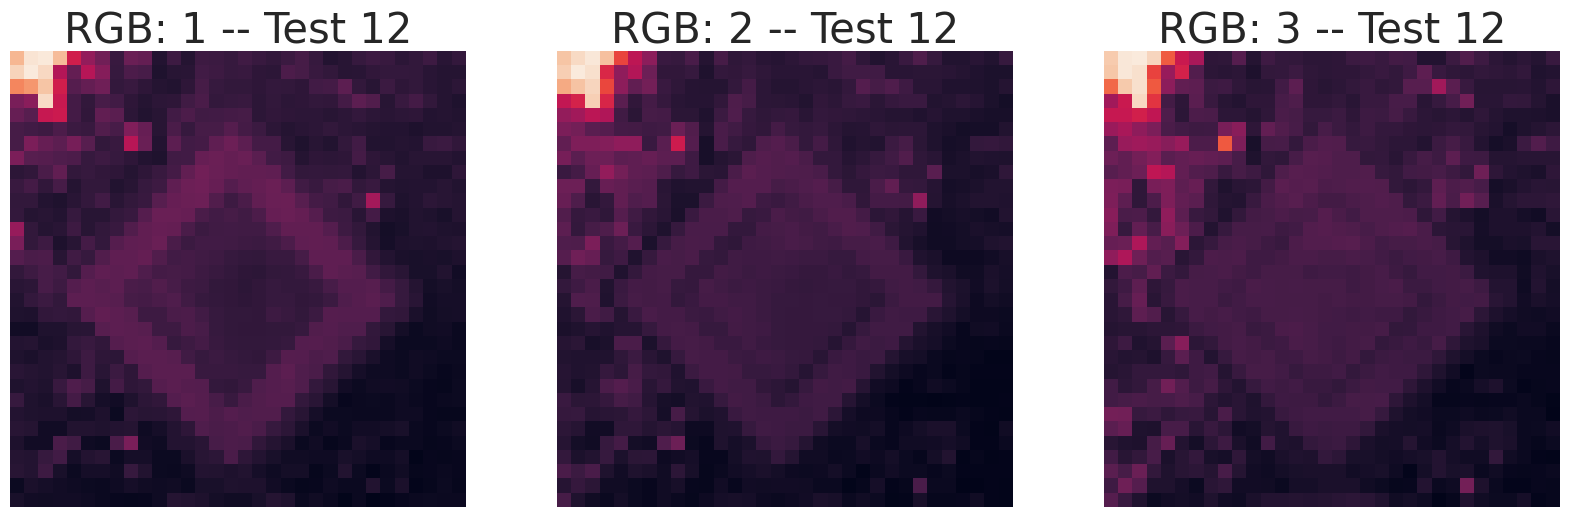

In [138]:
C_num = 12

# Separating Wrong Responses of the CNN Classifier

X_test_wrong,y_test_wrong = X_test[np.where(labels != pred_2)],labels[np.where(labels != pred_2)]

# print(X_test_wrong.shape)

# Finding Wrong Decisions for Label 12 (as we observed high wrong predictions for this class on test data)
X_test_wrong_12, y_test_wrong_12 = X_test_wrong[np.where(y_test_wrong == C_num)], y_test_wrong[np.where(y_test_wrong == C_num)]

# print(X_test_wrong1.shape)

X_train_12 = X_train[np.where(y_train[:,C_num] == 1)]

fig4, ax44 = pyplot.subplots(1,3, figsize = (20,6))
#fig5, ax55 = pyplot.subplots(1,3, figsize = (20,6))

for ii, c_ax44 in enumerate(ax44.flatten()):
    # Comparing X_train for Label == 12 with X_Test_wronge for Label == 12
    xxx, yyy= X_train_12[:,:,:,ii], X_test_wrong_12[:,:,:,ii]
    xxx_2   = np.array([yy.flatten() for yy in xxx])
    yyy_2   = np.array([yy.flatten() for yy in yyy]) 
    
    WD = np.zeros(900)
    pVal = np.zeros(900)
      
    for kk in range(1, 900):
        WD[kk], pVal[kk] = Wasserstein_Dist_PVal(xxx_2[:30,kk], yyy_2[:30,kk]) 
        
    WD2 = WD    

    print(1 - WD2[WD2 != 0].mean())
    #print(1 - WD2.mean())
    
    WD3 = WD
    WD3[pVal > 0.05] = 0
    
    J,Q     = xxx_2.shape
    z       = WD3
    zstar   = pVal #WD.mean()
    z0      = np.zeros(Q)
    z0      = z
    z1      = z0.copy()
    #z1[np.abs(z1)<zstar] = 0
    Z0      = np.reshape(z1, (30,30))
    #Z0i     = Z0.copy()
    #Z0i[np.abs(Z0i)<zstar] = 0
    #ZZ      = np.hstack( [Z0, Z0i] )
    
    z2      = WD
    Z02      = np.reshape(z2, (30,30))
    
    c_ax44.imshow(Z0, 'jet') # Can be replaced with Z0i
    c_ax44.set_title('RGB: {} of Set {} vs. Set {}'.format(ii, 1,2))
    c_ax44.axis('off')
    
fig5, ax55 = pyplot.subplots(1,3, figsize = (20,6))     

for ii, c_ax55 in enumerate(ax55.flatten()):
    c_ax55.imshow(X_train_12[1,:,:,ii], interpolation = 'none')
    c_ax55.set_title('RGB: {} -- Test {}'.format(ii+1, 12))
    c_ax55.axis("off")
    
fig4, ax8 = pyplot.subplots(1,3, figsize = (20,6))     

for ii, c_ax in enumerate(ax8.flatten()):
    c_ax.imshow(X_test_wrong_12[1,:,:,ii], interpolation = 'none')
    c_ax.set_title('RGB: {} -- Test {}'.format(ii+1, y_test_wrong_12[1]))
    c_ax.axis('off')   

0.8843872053872054
0.9097460496613996
0.9030988764044944


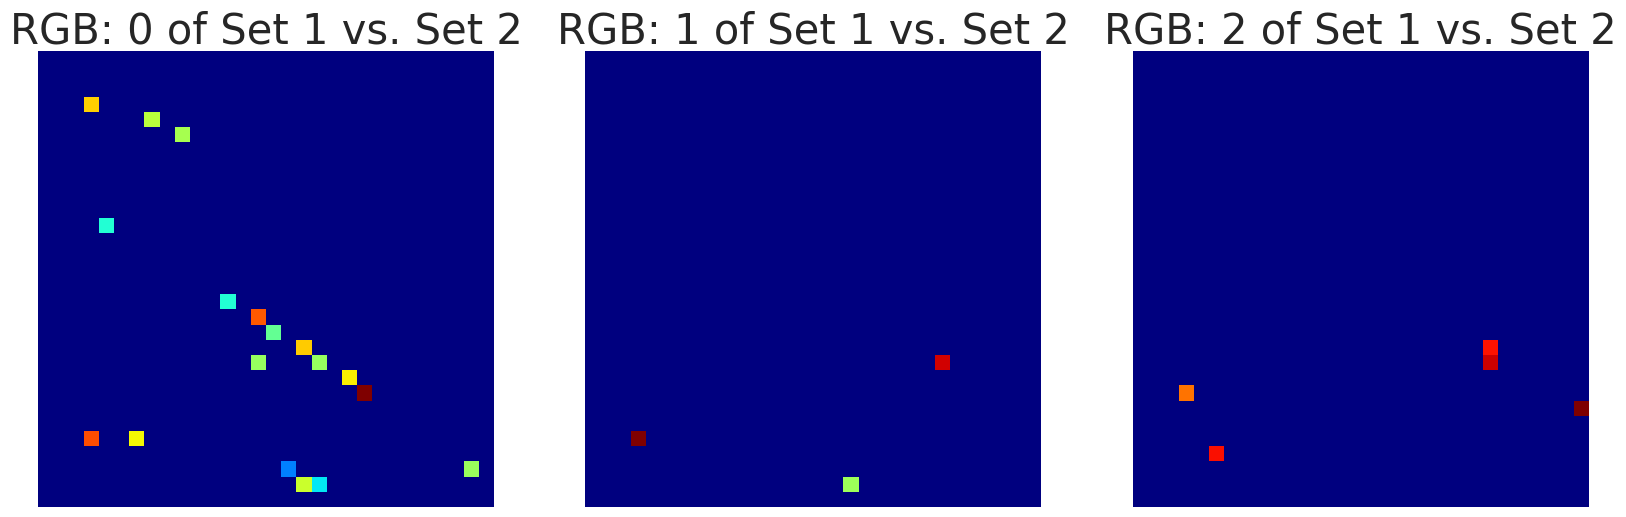

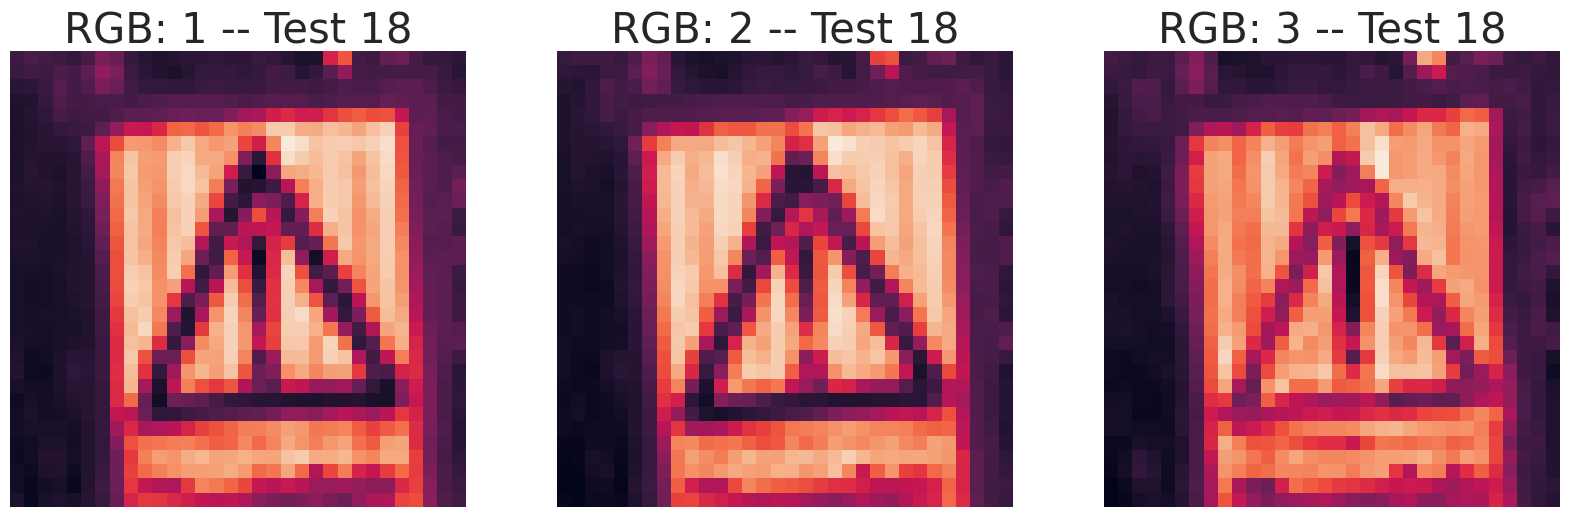

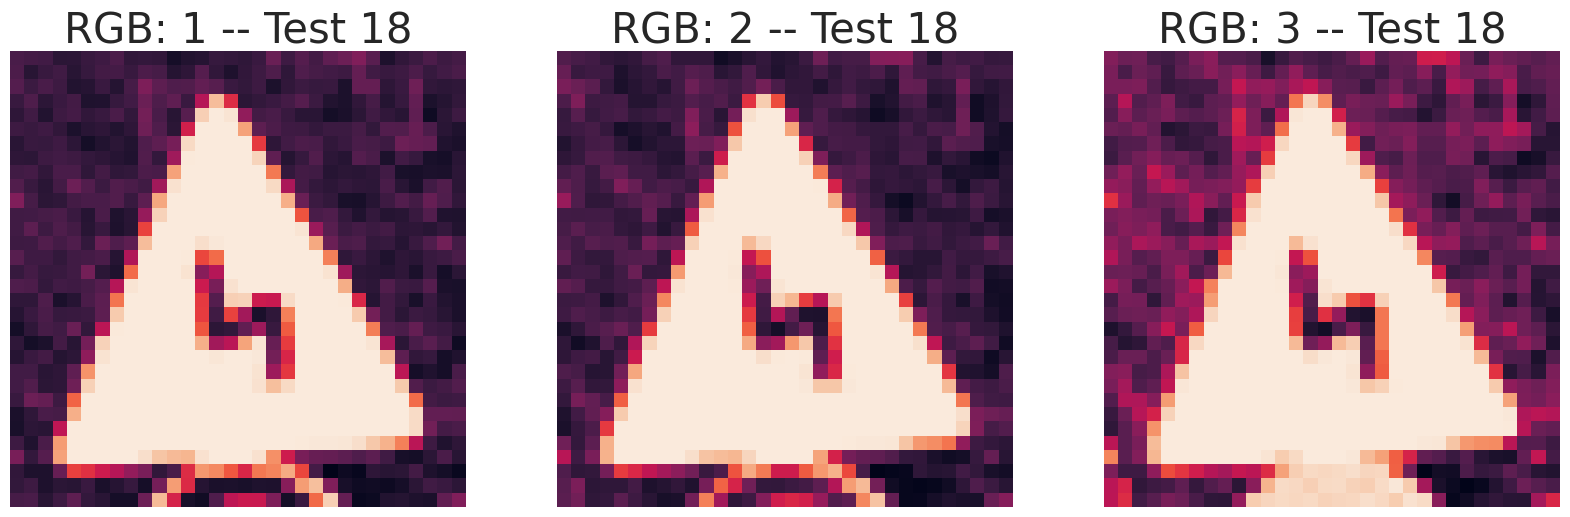

In [169]:
C_num = 18

# Separating Wrong Responses of the CNN Classifier

X_test_wrong,y_test_wrong = X_test[np.where(labels != pred_2)],labels[np.where(labels != pred_2)]

# print(X_test_wrong.shape)

# Finding Wrong Decisions for Label 18 
X_test_wrong_18, y_test_wrong_18 = X_test_wrong[np.where(y_test_wrong == C_num)], y_test_wrong[np.where(y_test_wrong == C_num)]

# print(X_test_wrong1.shape)

X_train_18 = X_train[np.where(y_train[:,C_num] == 1)]

fig4, ax44 = pyplot.subplots(1,3, figsize = (20,6))
#fig5, ax55 = pyplot.subplots(1,3, figsize = (20,6))

for ii, c_ax44 in enumerate(ax44.flatten()):
    # Comparing X_train for Label == 12 with X_Test_wronge for Label == 12
    xxx, yyy= X_train_18[:,:,:,ii], X_test_wrong_18[:,:,:,ii]
    xxx_2   = np.array([yy.flatten() for yy in xxx])
    yyy_2   = np.array([yy.flatten() for yy in yyy]) 
    
    WD = np.zeros(900)
    pVal = np.zeros(900)
      
    for kk in range(1, 900):
        WD[kk], pVal[kk] = Wasserstein_Dist_PVal(xxx_2[:30,kk], yyy_2[:30,kk]) 
        
    WD2 = WD    

    print(1 - WD2[WD2 != 0].mean())
    #print(1 - WD2.mean())
    
    WD3 = WD
    WD3[pVal > 0.05] = 0
    
    J,Q     = xxx_2.shape
    z       = WD3
    zstar   = pVal #WD.mean()
    z0      = np.zeros(Q)
    z0      = z
    z1      = z0.copy()
    #z1[np.abs(z1)<zstar] = 0
    Z0      = np.reshape(z1, (30,30))
    #Z0i     = Z0.copy()
    #Z0i[np.abs(Z0i)<zstar] = 0
    #ZZ      = np.hstack( [Z0, Z0i] )
    
    z2      = WD
    Z02      = np.reshape(z2, (30,30))
    
    c_ax44.imshow(Z0, 'jet') # Can be replaced with Z0i
    c_ax44.set_title('RGB: {} of Set {} vs. Set {}'.format(ii, 1,2))
    c_ax44.axis('off')
    
fig5, ax55 = pyplot.subplots(1,3, figsize = (20,6))     

for ii, c_ax55 in enumerate(ax55.flatten()):
    c_ax55.imshow(X_train_18[1,:,:,ii], interpolation = 'none')
    c_ax55.set_title('RGB: {} -- Test {}'.format(ii+1, 18))
    c_ax55.axis("off")
    
fig4, ax8 = pyplot.subplots(1,3, figsize = (20,6))     

for ii, c_ax in enumerate(ax8.flatten()):
    c_ax.imshow(X_test_wrong_21[1,:,:,ii], interpolation = 'none')
    c_ax.set_title('RGB: {} -- Test {}'.format(ii+1, y_test_wrong_18[1]))
    c_ax.axis('off')   

0.721272625698324
0.6917572383073496
0.6894104560622915


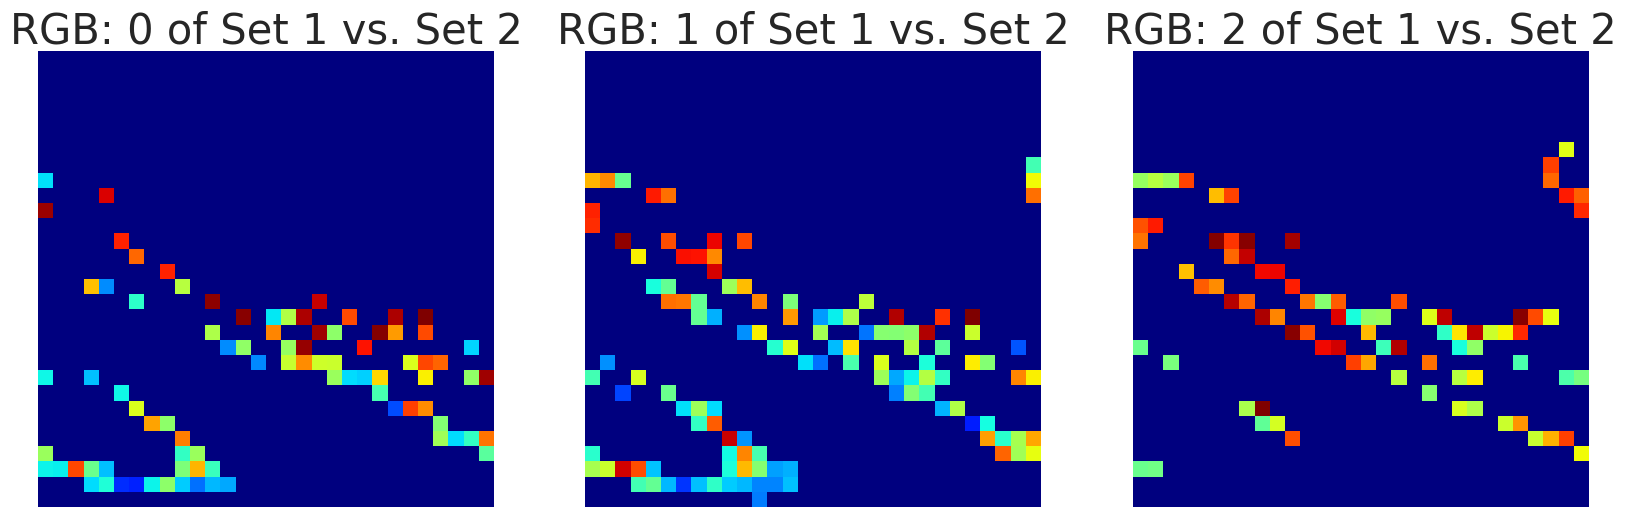

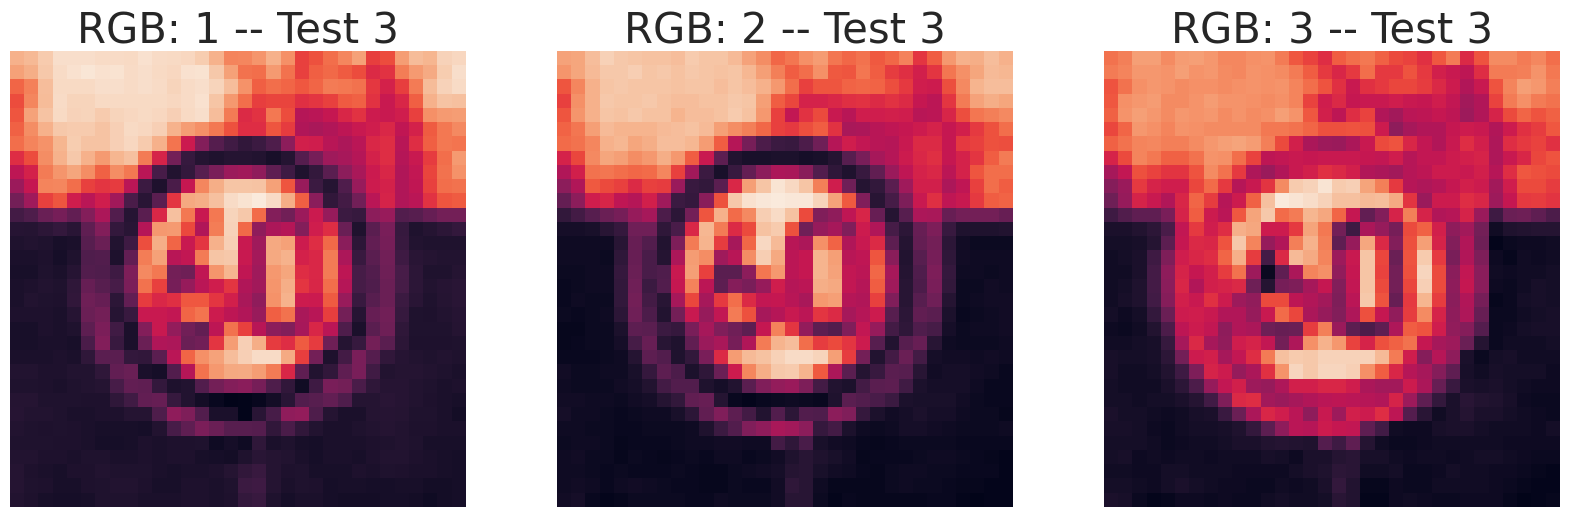

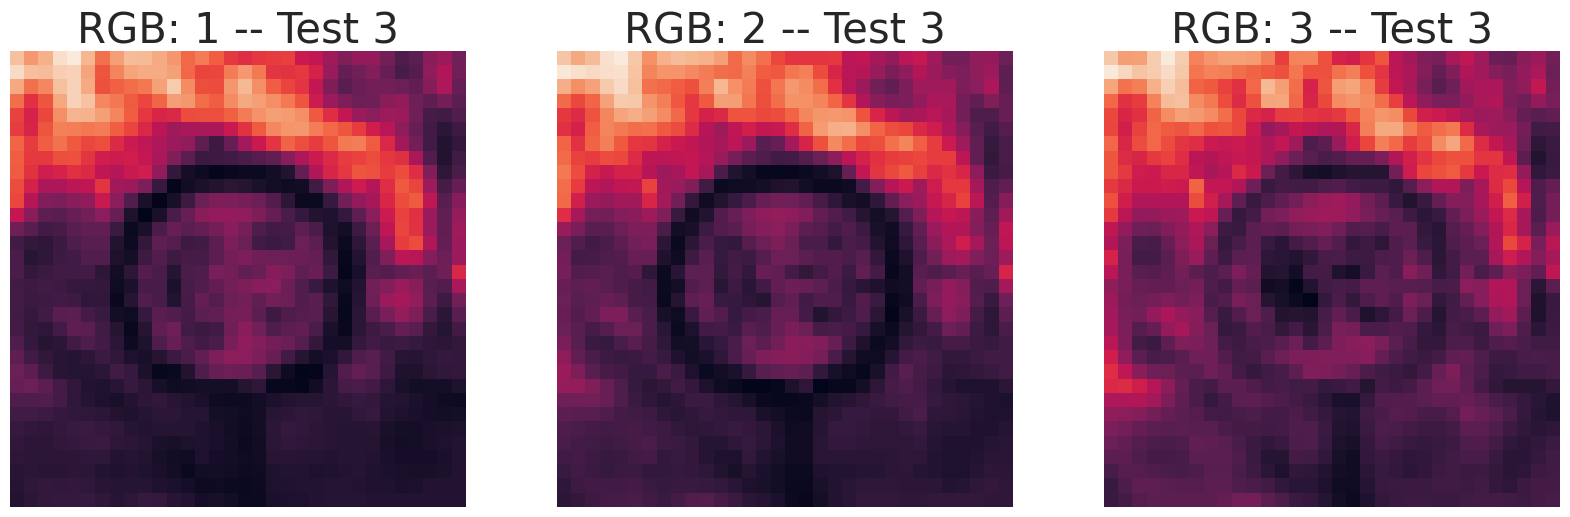

In [156]:
C_num = 3

# Separating Wrong Responses of the CNN Classifier
X_test_wrong, y_test_wrong = X_test[np.where(labels != pred_2)], labels[np.where(labels != pred_2)]

# print(X_test_wrong.shape)

# Finding Wrong Decisions for Label 3 (just an example)
X_test_wrong3, y_test_wrong3 = X_test_wrong[np.where(y_test_wrong == C_num)], y_test_wrong[np.where(y_test_wrong == C_num)]

# print(X_test_wrong1.shape)

X_train3 = X_train[np.where(y_train[:,C_num] == 1)]

fig4, ax44 = pyplot.subplots(1,3, figsize = (20,6))
#fig5, ax55 = pyplot.subplots(1,3, figsize = (20,6))

for ii, c_ax44 in enumerate(ax44.flatten()):
    # Comparing X_train for Label == 2 with X_Test_wronge for Label == 2
    xxx, yyy= X_train3[:,:,:,ii], X_test_wrong3[:,:,:,ii]
    xxx_2   = np.array([yy.flatten() for yy in xxx])
    yyy_2   = np.array([yy.flatten() for yy in yyy]) 
    
    WD = np.zeros(900)
    pVal = np.zeros(900)
      
    for kk in range(1, 900):
        WD[kk], pVal[kk] = Wasserstein_Dist_PVal(xxx_2[:30,kk], yyy_2[:30,kk]) 
        
    WD2 = WD    

    print(1 - WD2[WD2 != 0].mean())
    #print(1 - WD2.mean())
    
    WD3 = WD
    WD3[pVal > 0.05] = 0
    
    J,Q     = xxx_2.shape
    z       = WD3
    zstar   = pVal #WD.mean()
    z0      = np.zeros(Q)
    z0      = z
    z1      = z0.copy()
    #z1[np.abs(z1)<zstar] = 0
    Z0      = np.reshape(z1, (30,30))
    #Z0i     = Z0.copy()
    #Z0i[np.abs(Z0i)<zstar] = 0
    #ZZ      = np.hstack( [Z0, Z0i] )
    
    z2      = WD
    Z02      = np.reshape(z2, (30,30))
    
    c_ax44.imshow(Z0, 'jet') # Can be replaced with Z0i
    c_ax44.set_title('RGB: {} of Set {} vs. Set {}'.format(ii, 1,2))
    c_ax44.axis('off')
    
fig5, ax55 = pyplot.subplots(1,3, figsize = (20,6))     

for ii, c_ax55 in enumerate(ax55.flatten()):
    c_ax55.imshow(X_train3[1,:,:,ii], interpolation = 'none')
    c_ax55.set_title('RGB: {} -- Test {}'.format(ii+1, 3))
    c_ax55.axis("off")
    
fig4, ax8 = pyplot.subplots(1,3, figsize = (20,6))     

for ii, c_ax in enumerate(ax8.flatten()):
    c_ax.imshow(X_test_wrong3[1,:,:,ii], interpolation = 'none')
    c_ax.set_title('RGB: {} -- Test {}'.format(ii+1, y_test_wrong3[1]))
    c_ax.axis('off')    

In [160]:
# Wilson Confidence Interval

from math import sqrt
def wilson(p, n, z = 3.29): # The z-score for a 95% confidence interval is 1.96.
    denominator = 1 + z**2/n
    centre_adjusted_probability = p + z*z / (2*n)
    adjusted_standard_deviation = sqrt((p*(1 - p) + z*z / (4*n)) / n)
    
    lower_bound = (centre_adjusted_probability - z*adjusted_standard_deviation) / denominator
    upper_bound = (centre_adjusted_probability + z*adjusted_standard_deviation) / denominator
    
    return (lower_bound, upper_bound)





In [161]:

X_test_correct, y_test_correct = X_test[np.where(labels == pred_2)], labels[np.where(labels == pred_2)]

X_test_correct3, y_test_correct3 = X_test_correct[np.where(y_test_correct == 3)], y_test_correct[np.where(y_test_correct == 3)]

#print(X_test_correct3.shape[0])
#print(X_test_wrong3.shape[0])

print(1 - X_test_wrong3.shape[0]/X_test_correct3.shape[0])

Negative = X_test_wrong3.shape[0] 
total = X_test_wrong3.shape[0] + X_test_correct3.shape[0] 
p  = 1 - Negative / total

print(wilson(p, total))

445
5
0.9887640449438202
(0.9576584219930769, 0.9971527521620941)


In [165]:
X_test_correct, y_test_correct = X_test[np.where(labels == pred_2)], labels[np.where(labels == pred_2)]

X_test_correct12, y_test_correct12 = X_test_correct[np.where(y_test_correct == 12)], y_test_correct[np.where(y_test_correct == 12)]

#print(X_test_correct12.shape[0])
#print(X_test_wrong_12.shape[0])

print(1 - X_test_wrong_12.shape[0]/X_test_correct12.shape[0])

Negative = X_test_wrong_12.shape[0] 
total = X_test_wrong_12.shape[0] + X_test_correct12.shape[0] 
p  = 1 - Negative / total

print(wilson(p, total))

651
39
0.9400921658986175
(0.90712388693671, 0.966133753603905)


In [173]:

X_test_correct, y_test_correct = X_test[np.where(labels == pred_2)], labels[np.where(labels == pred_2)]

X_test_correct18, y_test_correct18 = X_test_correct[np.where(y_test_correct == 18)], y_test_correct[np.where(y_test_correct == 18)]

#print(X_test_correct21.shape[0])
#print(X_test_wrong_21.shape[0])

print(1 - X_test_wrong_18.shape[0]/X_test_correct18.shape[0])

Negative = X_test_wrong_18.shape[0] 
total = X_test_wrong_18.shape[0] + X_test_correct18.shape[0] 
p  = 1 - Negative / total

print(wilson(p, total))

0.9402173913043478
(0.891850227388902, 0.9713713204172303)


In [77]:
# VGG 16 Implementation 
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical

In [78]:
batch_size = 128
seed = 27
train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)
train_dataset = train_datagen.flow_from_directory(train_path,
                                                  target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  seed=seed,
                                                  color_mode='rgb',
                                                  interpolation='hamming',
                                                  subset='training')

val_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)
val_dataset = val_datagen.flow_from_directory(train_path,
                                                target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True,
                                                seed=seed,
                                                color_mode='rgb',
                                                interpolation='hamming',
                                                subset='validation')

Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.


In [79]:
def map_pred(pred):
    return [int(list(train_dataset.class_indices.keys())[i]) for i in pred]
test_df = pd.read_csv(data_dir + 'Test.csv')

test_labels = test_df["ClassId"].values
imgs = test_df["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

In [81]:
model_vgg = Sequential()
model_vgg.add(VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)))
model_vgg.add(BatchNormalization())
model_vgg.add(Flatten())
model_vgg.add(Dense(1024, activation='relu'))
model_vgg.add(Dense(43, activation='softmax'))




In [86]:
alpha=0.001
epochs=100
optim = keras.optimizers.Adam(learning_rate=alpha)
model_vgg.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [87]:
vgg_history = model_vgg.fit(train_dataset,
                        steps_per_epoch=len(train_dataset),
                        epochs=epochs,
                        validation_data=val_dataset,
                        validation_steps=len(val_dataset))

Epoch 1/100
246/246 [==============================] - 18s 59ms/step - loss: 0.0521 - accuracy: 0.9850 - val_loss: 0.5099 - val_accuracy: 0.9112
Epoch 2/100
246/246 [==============================] - 15s 60ms/step - loss: 0.0299 - accuracy: 0.9912 - val_loss: 0.4564 - val_accuracy: 0.9276
Epoch 3/100
246/246 [==============================] - 15s 60ms/step - loss: 0.0500 - accuracy: 0.9857 - val_loss: 0.5883 - val_accuracy: 0.8957
Epoch 4/100
246/246 [==============================] - 15s 60ms/step - loss: 0.0875 - accuracy: 0.9768 - val_loss: 0.2327 - val_accuracy: 0.9550
Epoch 5/100
246/246 [==============================] - 15s 60ms/step - loss: 0.0327 - accuracy: 0.9906 - val_loss: 0.5752 - val_accuracy: 0.8862
Epoch 6/100
246/246 [==============================] - 15s 60ms/step - loss: 0.0494 - accuracy: 0.9867 - val_loss: 0.2650 - val_accuracy: 0.9549
Epoch 7/100
246/246 [==============================] - 15s 60ms/step - loss: 0.0344 - accuracy: 0.9901 - val_loss: 0.2370 - val_ac

In [85]:
model_vgg.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 batch_normalization (BatchN  (None, 1, 1, 512)        2048      
 ormalization)                                                   
                                                                 
 flatten_5 (Flatten)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 1024)              525312    
                                                                 
 dense_11 (Dense)            (None, 43)                44075     
                                                                 
Total params: 15,286,123
Trainable params: 15,285,099
Non-trainable params: 1,024
______________________________________

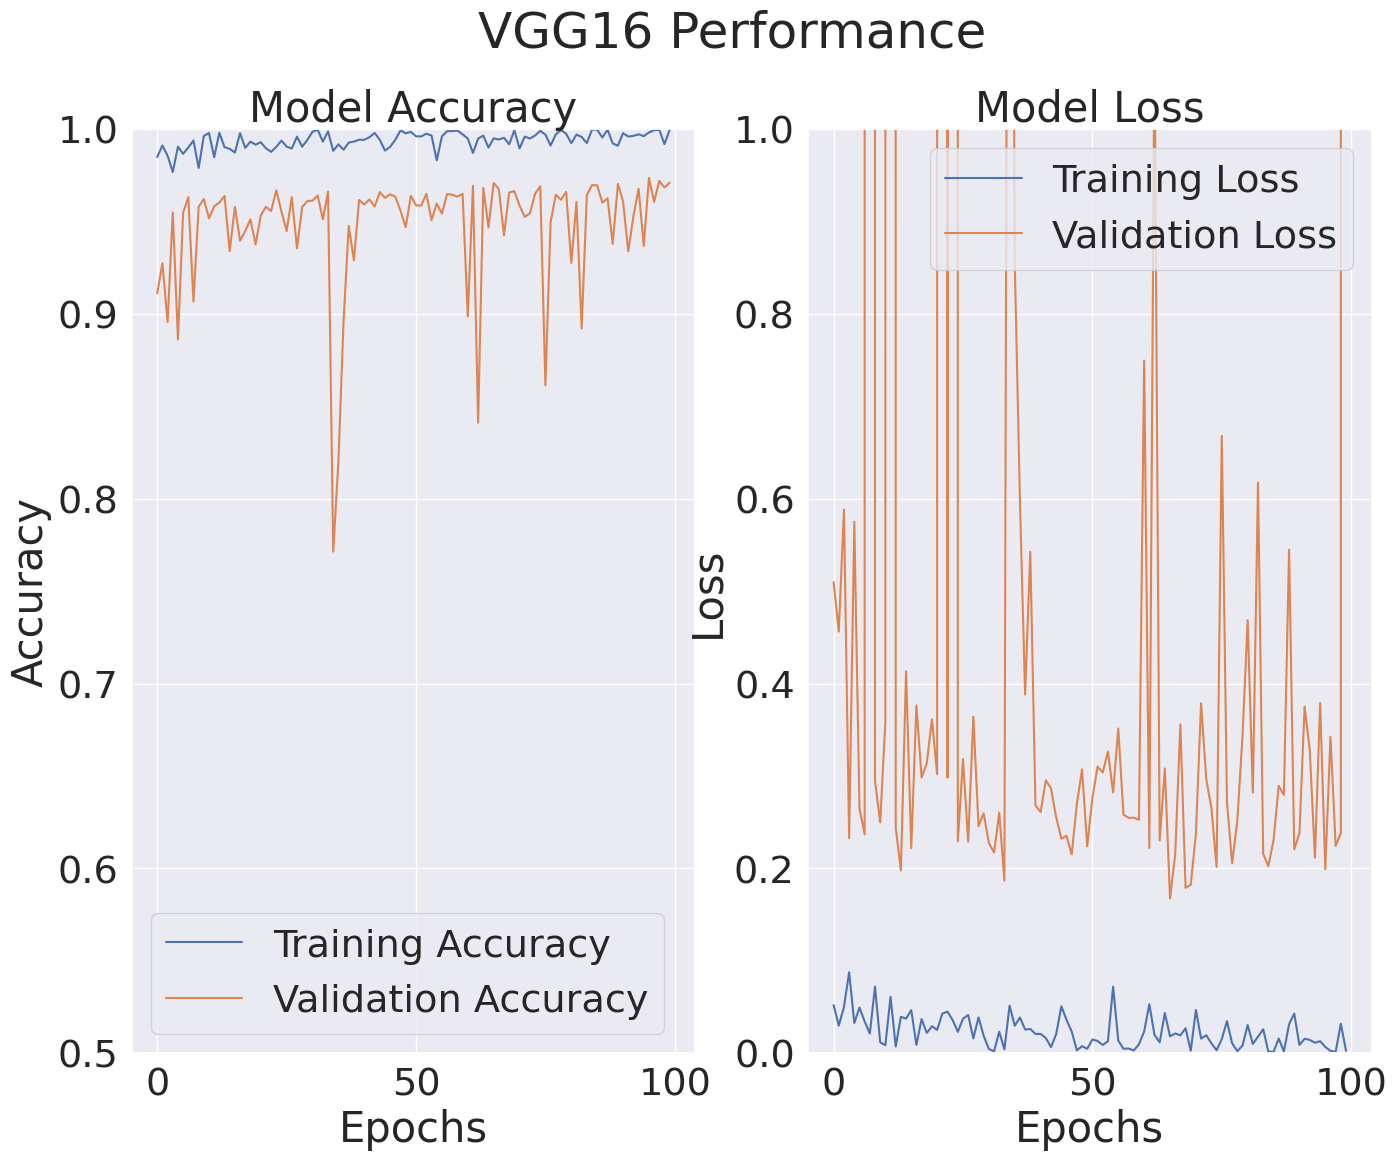

<Figure size 1000x700 with 0 Axes>

In [149]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(16,12)
performance = pd.DataFrame(vgg_history.history)
plt.figure(figsize=(10,7))
ax[1].plot(performance[['loss','val_loss']])
ax[1].legend(['Training Loss', 'Validation Loss'])
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_ylim(0,1)
ax[0].plot(performance[['accuracy','val_accuracy']])
ax[0].legend(['Training Accuracy', 'Validation Accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0.5,1)
fig.suptitle('VGG16 Performance')
plt.show()

In [147]:
from sklearn.metrics import accuracy_score
pred_vgg = model_vgg.predict(X_test)
predmap_vgg= map_pred(pred_vgg.argmax(axis=-1))
print('Test Data accuracy: ',accuracy_score(test_labels, predmap_vgg)*100)

395/395 [==============================] - 3s 7ms/step
Test Data accuracy:  59.31116389548694


In [91]:
model_vgg.save('Vgg_model')

INFO:tensorflow:Assets written to: Vgg_model/assets


INFO:tensorflow:Assets written to: Vgg_model/assets


In [148]:
print(classification_report(labels, predmap_vgg))


              precision    recall  f1-score   support

           0       0.25      0.77      0.37        60
           1       0.89      0.80      0.84       720
           2       0.93      0.90      0.92       750
           3       0.66      0.77      0.71       450
           4       0.99      0.92      0.96       660
           5       0.67      0.77      0.72       630
           6       0.40      0.95      0.56       150
           7       0.56      0.91      0.69       450
           8       0.60      0.57      0.59       450
           9       0.95      0.70      0.81       480
          10       0.86      0.70      0.77       660
          11       1.00      0.91      0.95       420
          12       0.20      0.12      0.15       690
          13       0.86      0.68      0.76       720
          14       0.00      0.00      0.00       270
          15       0.10      0.12      0.11       210
          16       0.86      0.72      0.79       150
          17       0.00    

/home/satya/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/satya/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/satya/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
